## Business Case :- Ford Vehicle Price Analysis Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('ford.csv')

In [3]:
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


### Domain Analysis

- model: The make or model of the car (e.g., Fiesta, Focus).
- year: The year of manufacture.
- price: The price of the car in the listing.
- transmission: The type of transmission (e.g., Automatic, Manual).
- mileage: The total distance the car has been driven, likely in miles.
- fuelType: The type of fuel the car uses (e.g., Petrol, Diesel).
- tax: The road tax or vehicle tax associated with the car.
- mpg: Miles per gallon, indicating the fuel efficiency of the car.
- engineSize: The size of the car's engine in liters.


This dataset is well-suited for analysis in the automotive domain, particularly focusing on the used car market. Here are some potential analyses you could perform:

1. **Price Analysis**:
   - Investigate the distribution of car prices based on model, year, or mileage.
   - Determine which factors (e.g., transmission, engine size) most influence the price of a used car.

2. **Fuel Efficiency Analysis**:
   - Compare the fuel efficiency (mpg) of different models and engine sizes.
   - Analyze how fuel type impacts fuel efficiency.

3. **Depreciation Study**:
   - Study how the price of cars decreases over time based on their year of manufacture and mileage.

4. **Transmission Type Impact**:
   - Explore the preference for manual vs. automatic transmission in terms of price and availability.

5. **Tax and Engine Size Correlation**:
   - Analyze if there's a relationship between the engine size and the tax amount.

This dataset offers a comprehensive view of factors that are crucial for both buyers and sellers in the used car market.

## Basic Check

In [4]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [5]:
data.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2
17965,Focus,2015,8299,Manual,5007,Petrol,22,57.7,1.0


In [6]:
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [7]:
data.drop('model',inplace=True,axis=True) ## This columns is not important for my dataset

In [8]:
data.duplicated().sum()  ## check duplicated values

155

In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17811 entries, 0 to 17965
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          17811 non-null  int64  
 1   price         17811 non-null  int64  
 2   transmission  17811 non-null  object 
 3   mileage       17811 non-null  int64  
 4   fuelType      17811 non-null  object 
 5   tax           17811 non-null  int64  
 6   mpg           17811 non-null  float64
 7   engineSize    17811 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 1.2+ MB


In [11]:
data.sort_values('price')

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17103,2003,495,Manual,177644,Petrol,200,41.5,1.6
14222,2005,675,Manual,97000,Diesel,205,48.7,2.0
16904,2005,675,Manual,121000,Petrol,235,39.8,2.0
16811,2005,675,Manual,108000,Petrol,260,36.2,1.8
16704,2008,694,Manual,82020,Petrol,145,47.1,1.2
...,...,...,...,...,...,...,...,...
12613,2019,45250,Automatic,2500,Petrol,145,22.1,5.0
17866,2020,48000,Manual,50,Petrol,145,23.9,5.0
11910,2017,48999,Automatic,7546,Petrol,145,23.5,5.0
11913,2017,49999,Manual,21575,Petrol,145,20.9,5.0


In [12]:
data.isnull().sum()  ## check NaN values

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [13]:
data.isnull().sum()/len(data)*100   ## check Nan Values in percentage

year            0.0
price           0.0
transmission    0.0
mileage         0.0
fuelType        0.0
tax             0.0
mpg             0.0
engineSize      0.0
dtype: float64

In [14]:
data.nunique()

year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [15]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000,17811.000000
mean,2016.862276,12269.683791,23381.897648,113.313233,57.909258,1.350699
std,2.052035,4736.387823,19419.297339,62.035890,10.132703,0.432474
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11289.000000,18280.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,31099.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [16]:
data.describe(include='O')

,transmission,fuelType
count,17811,17811
unique,3,5
top,Manual,Petrol
freq,15382,12080


In [17]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


## Exploratory Data Analysis

### Univariate analysis using sweetviz

In [18]:
import sweetviz as sv
my_report = sv.analyze(data)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


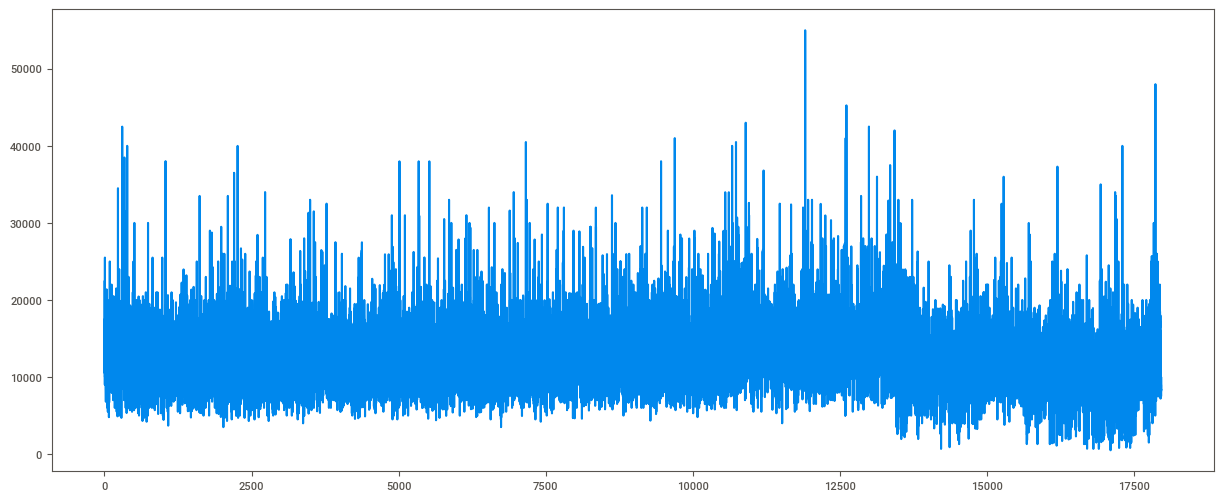

In [19]:
plt.figure(figsize=(15,6))
plt.plot(data['price'])

<Axes: xlabel='year', ylabel='price'>

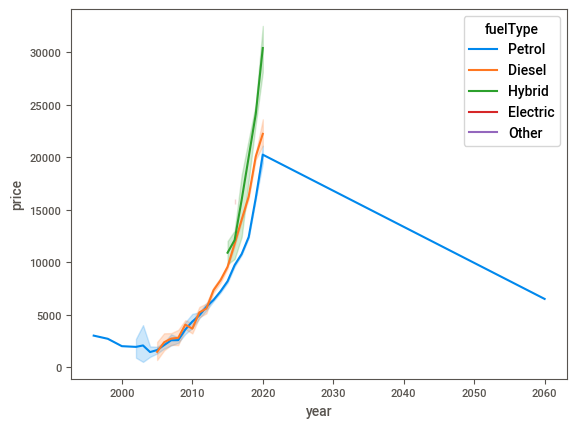

In [20]:
sns.lineplot(x='year',y='price',data=data,hue='fuelType')

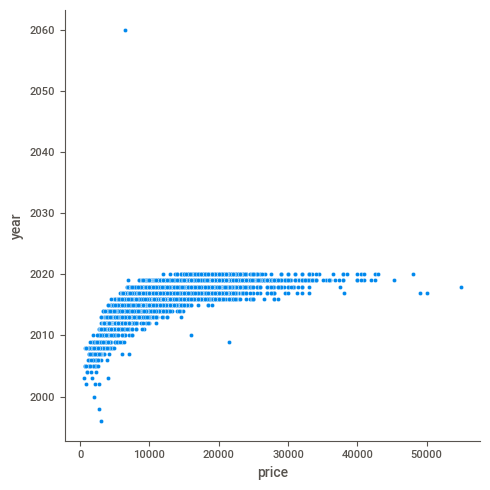

In [21]:
sns.relplot(y='year',x='price',data=data,)

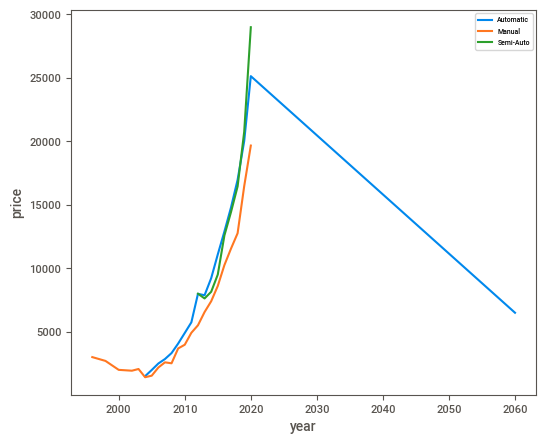

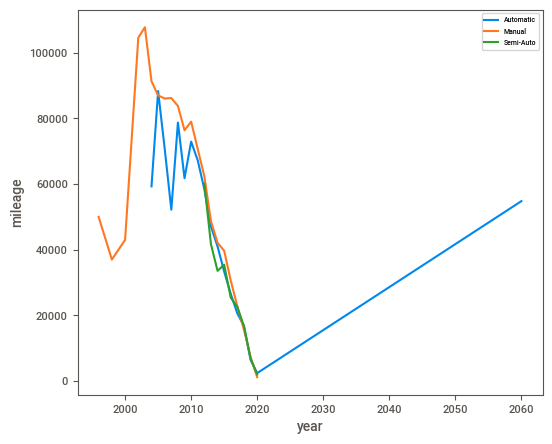

In [22]:
plt.figure(figsize=(6,5))
sns.lineplot(x='year',y='price',data=data,hue='transmission',ci=None)
plt.legend(fontsize=5)
plt.figure(figsize=(6,5))
sns.lineplot(x='year',y='mileage',hue='transmission',data=data,ci=None)
plt.legend(fontsize=5)

In [23]:
cat_col=data.select_dtypes(include='O')
cat_col.columns

Index(['transmission', 'fuelType'], dtype='object')

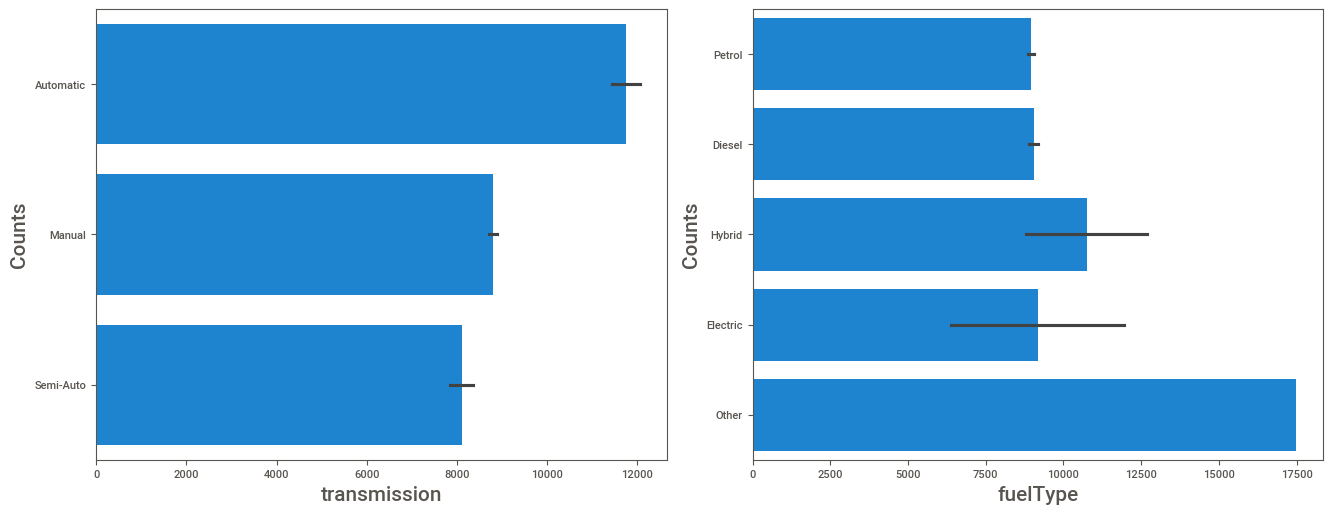

In [24]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in cat_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(cat_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel("Counts",fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Biavariant Analysis

#### Checking relationship of all variables with respect to target variable

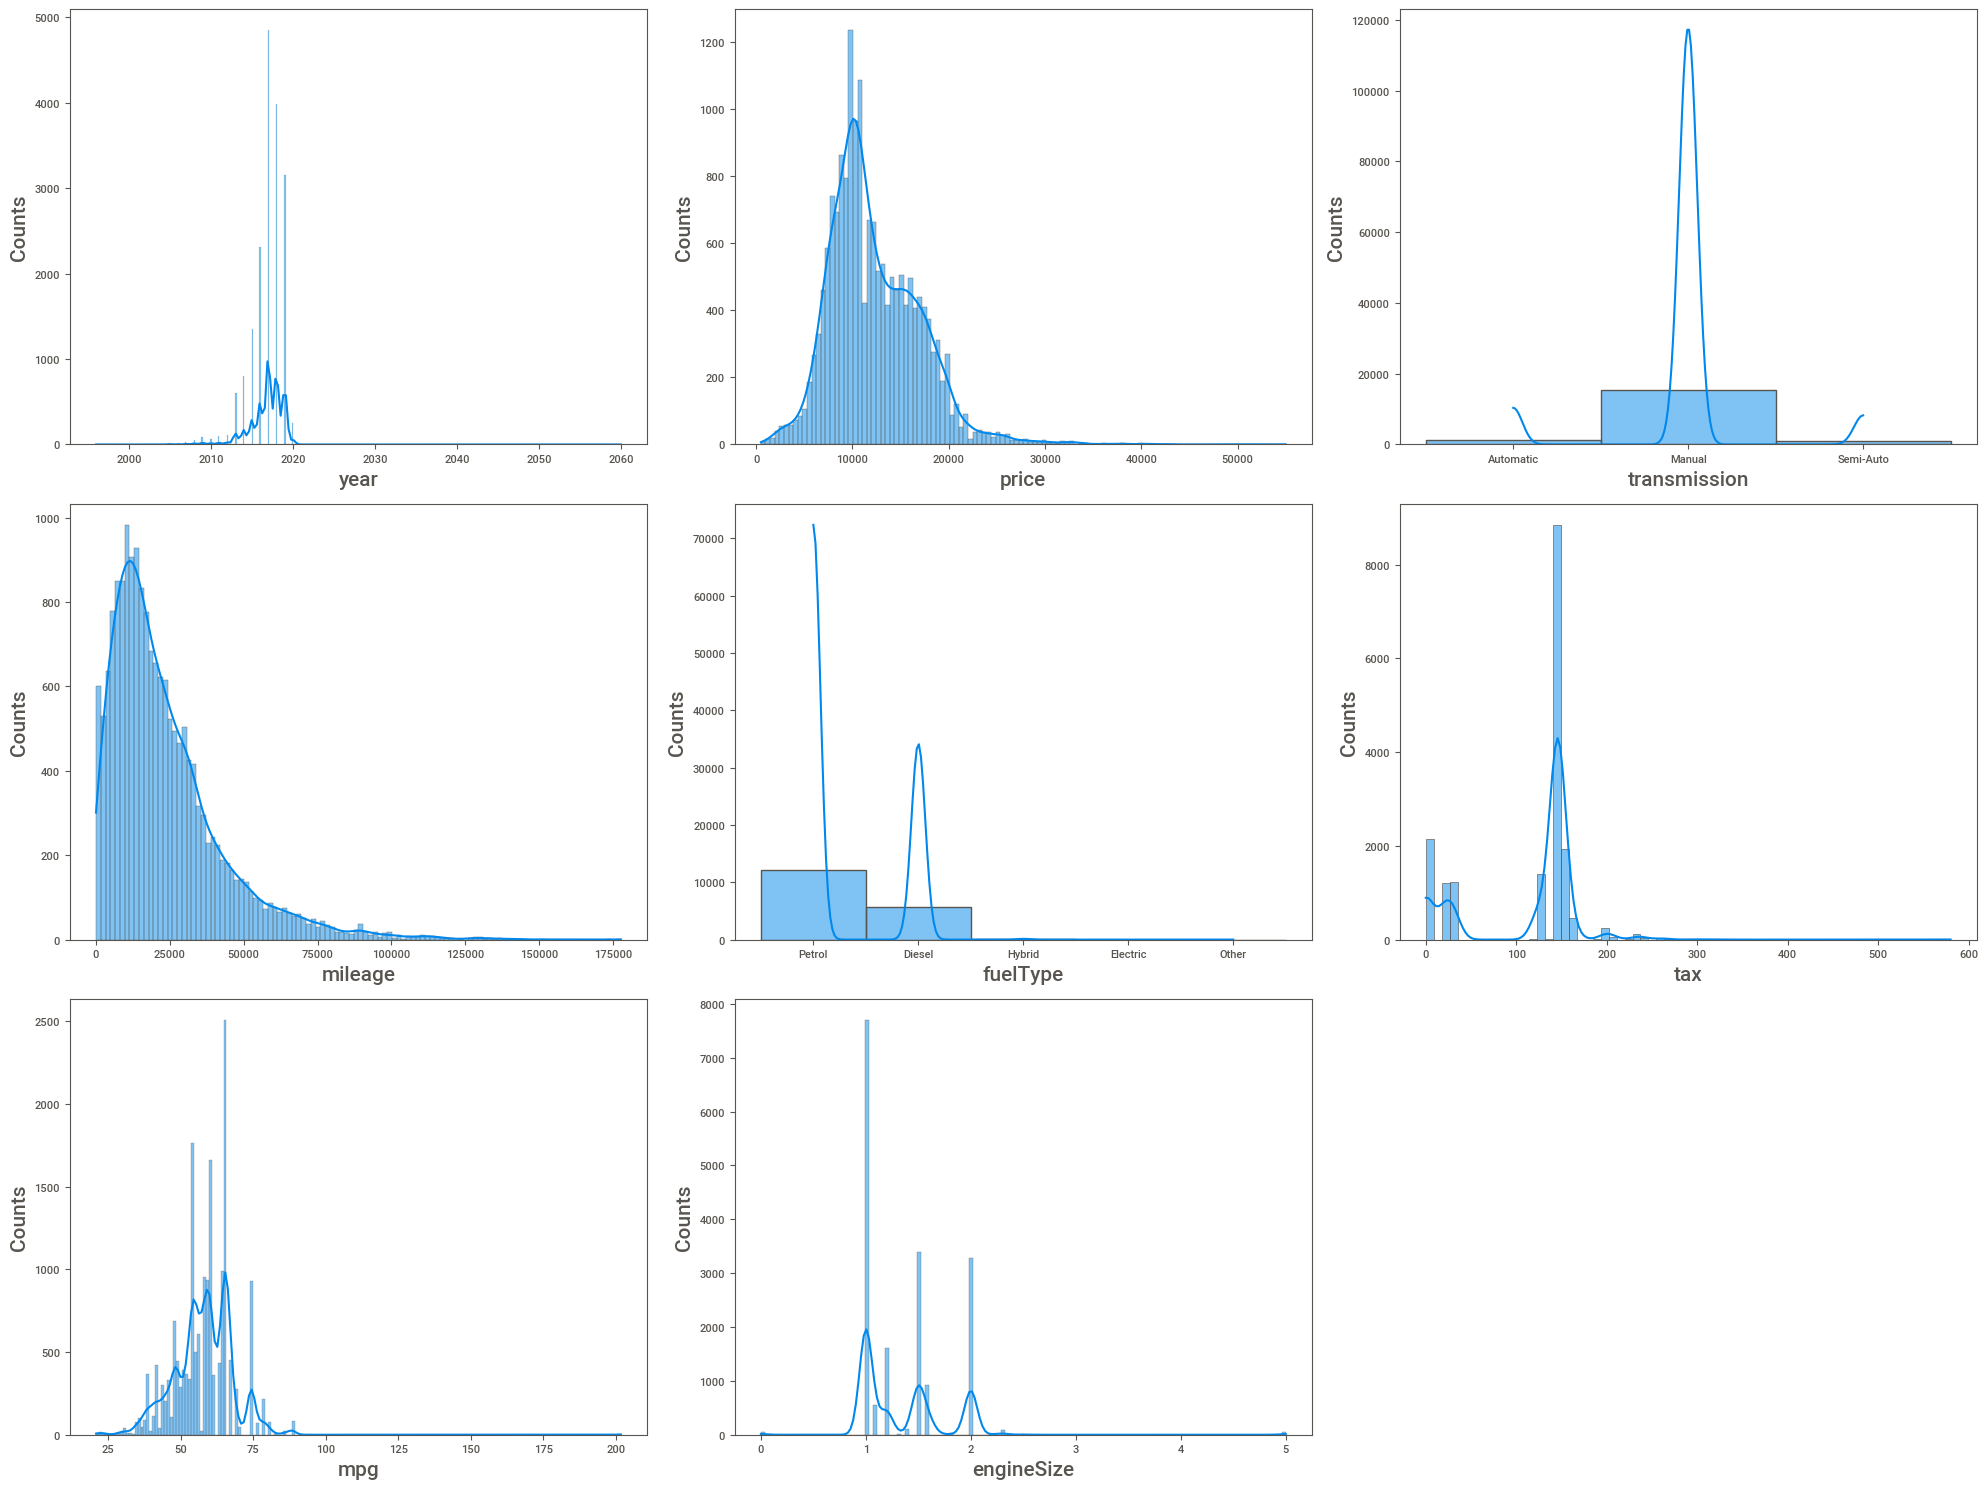

In [26]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in data:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.histplot(data[i],kde=True)
        plt.xlabel(i,fontsize=15)
        plt.ylabel("Counts",fontsize=15)
    plotnumber+=1
plt.tight_layout()

## Insights

**General Observations:**

- **Skewness:** Many of the distributions are skewed, indicating that the majority of data points are concentrated on one side of the distribution. This is particularly evident for attributes like `year`, `price`, `mileage`, `weight`, and `mpg`.
- **Outliers:** Some histograms show clear outliers, which are data points that are significantly different from the majority of the data. These can be seen in attributes like `price`, `mileage`, and `mpg`.
- **Multimodality:** A few distributions exhibit multiple peaks (modes), suggesting that there might be distinct groups or clusters within the data. This is noticeable in `price` and `mpg`.

**Specific Insights:**

- **`year`:** The distribution is skewed to the right, indicating that there are more cars from recent years.
- **`price`:** The distribution is highly skewed to the right, with a long tail representing high-priced cars. There are also some outliers on the high-end side.
- **`transmission`:** The distribution is heavily skewed to the left, with most cars having automatic transmissions.
- **`mileage`:** The distribution is skewed to the right, with a long tail representing cars with high mileage. There are also some outliers on the high-end side.
- **`fuelType`:** The distribution is relatively uniform, with no clear dominant fuel type.
- **`weight`:** The distribution is skewed to the right, with a long tail representing heavier cars.
- **`bodyType`:** The distribution is skewed to the right, with sedan being the most common body type.
- **`tax`:** The distribution is skewed to the right, with a long tail representing higher tax amounts.
- **`mpg`:** The distribution is bimodal, with two distinct peaks suggesting two groups of cars with different fuel efficiencies.
- **`engineSize`:** The distribution is skewed to the right, with a long tail representing larger engine sizes.

**Overall, the analysis suggests that the dataset contains a diverse range of cars with varying characteristics. The skewness and outliers observed in many attributes highlight the need for further exploration and potential data cleaning or normalization before conducting more in-depth analysis.**


In [27]:
data.dtypes

year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax               int64
mpg             float64
engineSize      float64
dtype: object

In [28]:
num_col = data.select_dtypes(include=['int','float'])
num_col.columns

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize'], dtype='object')

## Check Outliers

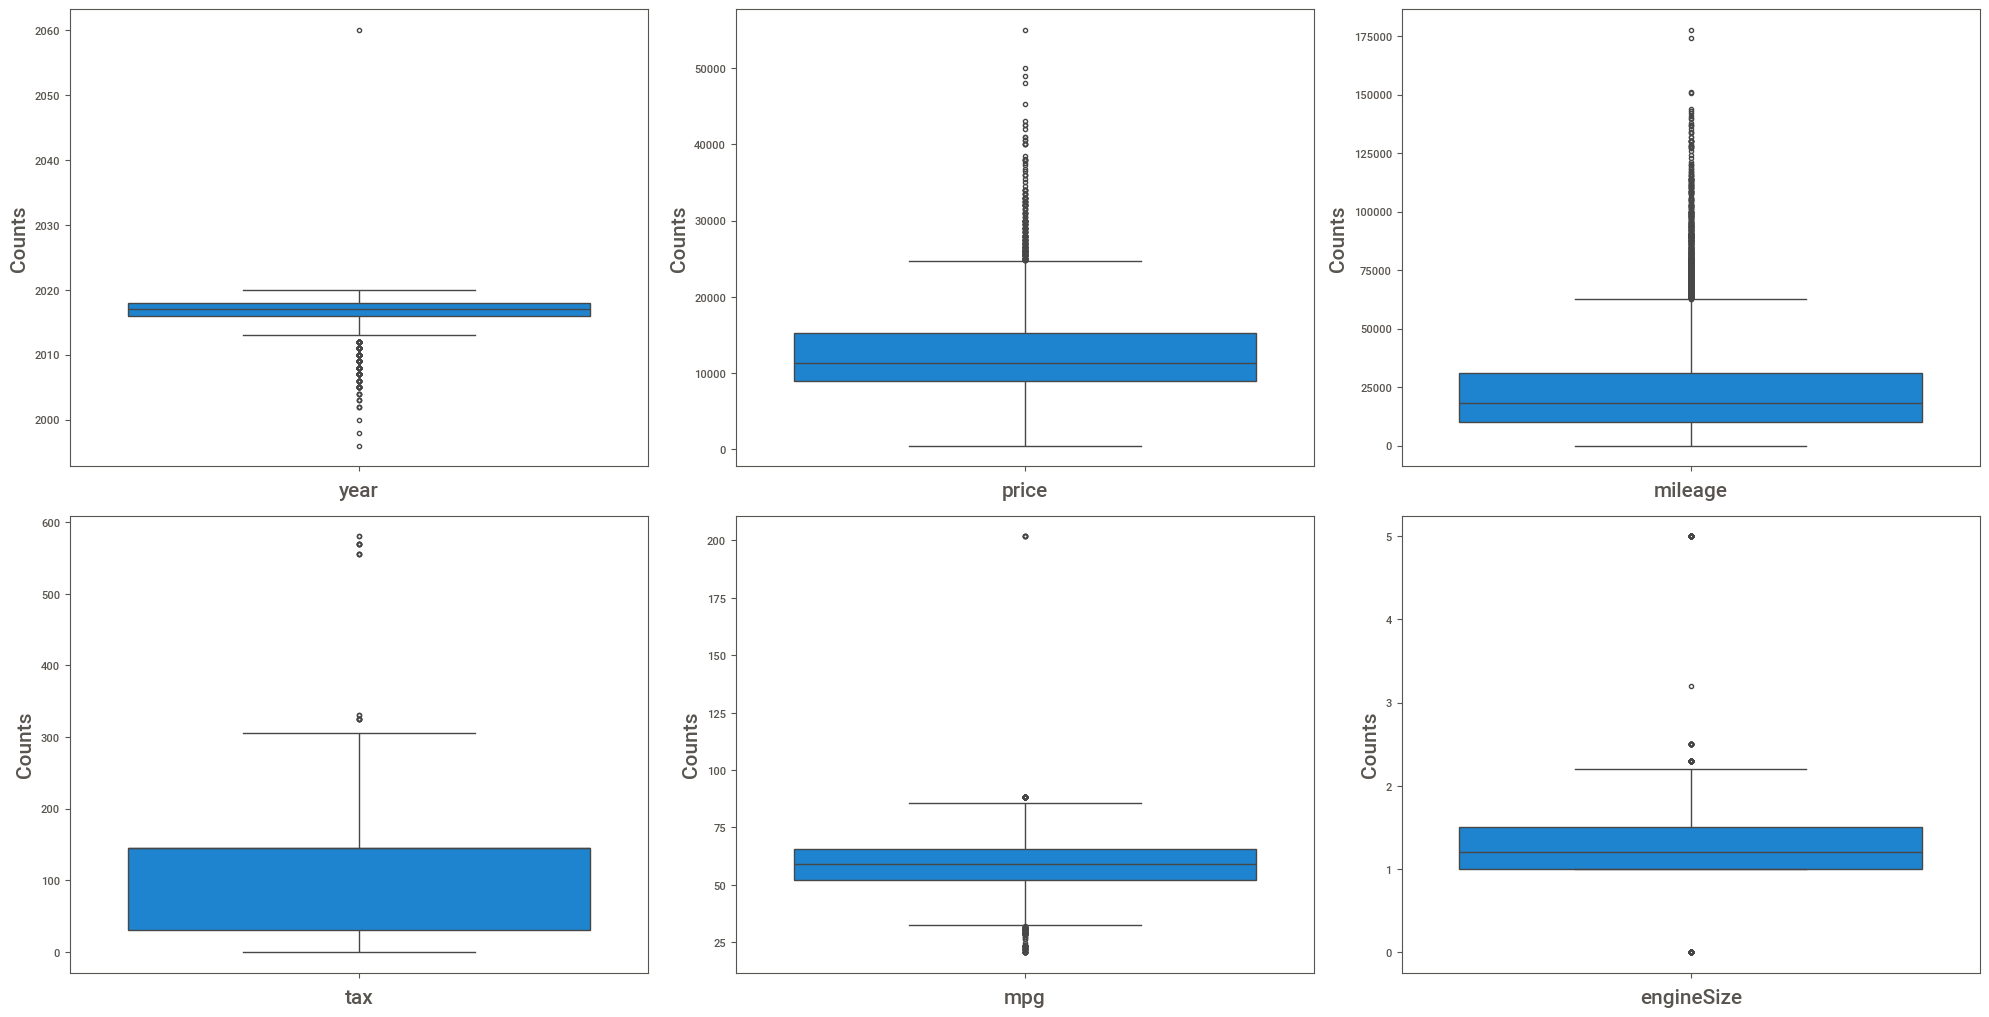

In [29]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in num_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel("Counts",fontsize=15)
    plotnumber+=1
plt.tight_layout()

<Axes: >

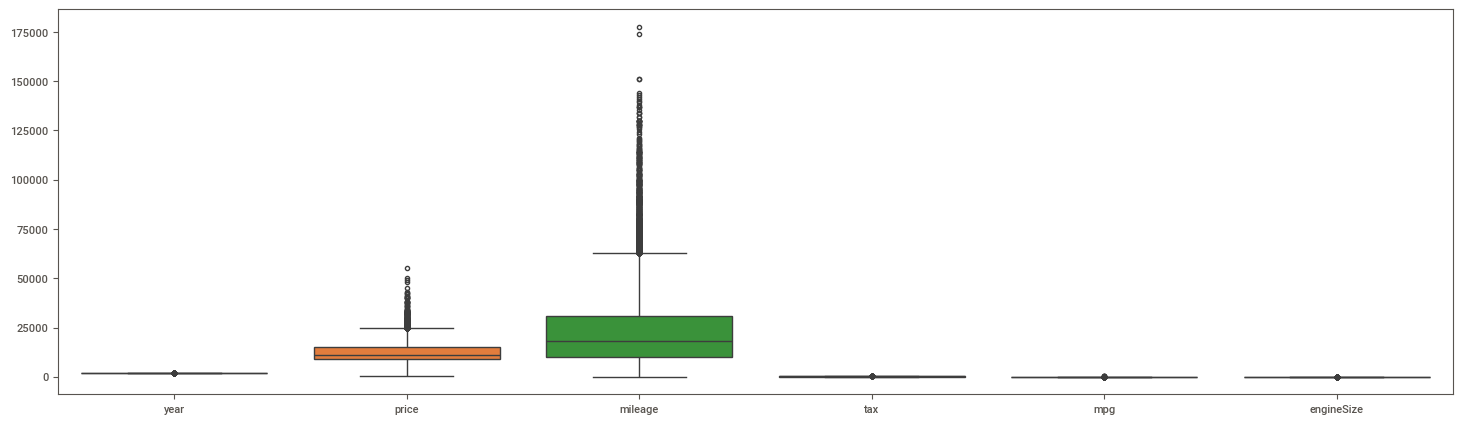

In [30]:
fig , ax = plt.subplots(figsize=(18,5))
sns.boxplot(data=data, ax=ax)

## Handling Outliers

In [31]:
## year
Q3 = data.year.quantile(0.75)
Q1 = data.year.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [32]:
len(data.loc[data['year']>upper_limit])/len(data)*100

0.005614507888383583

In [33]:
len(data.loc[data['year']<lower_limit])/len(data)*100

2.7904104205266407

In [34]:
data.loc[data['year']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [35]:
data.loc[data['year']>upper_limit,'year']=data['year'].median()

In [36]:
data.loc[data['year']==2060]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [37]:
data.loc[data['year']<lower_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13463,2012,5250,Manual,46970,Petrol,125,50.4,1.2
13464,2008,3495,Manual,27930,Petrol,235,39.8,1.8
13466,2010,4750,Automatic,26588,Petrol,260,37.7,1.6
13467,2012,5495,Manual,53210,Petrol,125,50.4,1.2
13468,2009,3695,Manual,62000,Petrol,145,49.6,1.2
...,...,...,...,...,...,...,...,...
17761,2005,2495,Automatic,87908,Petrol,265,36.7,1.6
17780,2012,5500,Manual,64068,Petrol,150,48.7,1.4
17785,2012,5500,Manual,64068,Diesel,125,51.4,1.4
17816,2009,4000,Manual,49500,Petrol,150,49.6,1.4


In [38]:
data.loc[data['year']<lower_limit,'year']=data['year'].median()

In [39]:
data.loc[data['year']<lower_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [40]:
## price 
Q3 = data.price.quantile(0.75)
Q1 = data.price.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [41]:
len(data.loc[data['price']>upper_limit])/len(data)*100

1.5832912245241704

In [42]:
len(data.loc[data['price']<lower_limit])/len(data)*100

0.0

In [43]:
data.loc[data['price']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
8,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
91,2016,24995,Manual,7997,Petrol,235,36.7,2.3
230,2020,34498,Semi-Auto,4623,Diesel,145,43.5,2.0
302,2020,42489,Automatic,3500,Petrol,145,22.1,5.0
339,2020,38489,Automatic,3500,Petrol,145,30.7,2.3
...,...,...,...,...,...,...,...,...
17838,2020,30000,Automatic,1000,Diesel,145,43.5,2.0
17866,2020,48000,Manual,50,Petrol,145,23.9,5.0
17868,2020,25050,Manual,50,Diesel,145,38.2,2.0
17890,2018,25999,Automatic,19458,Diesel,145,47.9,2.0


In [44]:
data.loc[data['price']>upper_limit,'price']=data['price'].mean()

In [45]:
data.loc[data['price']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [46]:
## mileage
Q3 = data.mileage.quantile(0.75)
Q1 = data.mileage.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [47]:
len(data.loc[data['mileage']>upper_limit])/len(data)*100

4.8509348155634155

In [48]:
len(data.loc[data['mileage']<lower_limit])/len(data)*100

0.0

In [49]:
data.loc[data['mileage']>upper_limit,'mileage']=data['mileage'].mean()

In [50]:
data.loc[data['mileage']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [51]:
## tax
Q3 = data.tax.quantile(0.75)
Q1 = data.tax.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [52]:
len(data.loc[data['tax']>upper_limit])/len(data)*100

0.11229015776767168

In [53]:
len(data.loc[data['tax']<lower_limit])/len(data)*100

0.0

In [54]:
data.loc[data['tax']>upper_limit,'tax']=data['tax'].mean()

In [55]:
data.loc[data['tax']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [56]:
## mpg
Q3 = data.mpg.quantile(0.75)
Q1 = data.mpg.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [57]:
len(data.loc[data['mpg']>upper_limit])/len(data)*100

0.49969120206613893

In [58]:
len(data.loc[data['mpg']<lower_limit])/len(data)*100

0.7130425018247151

In [59]:
data.loc[data['mpg']>upper_limit,'mpg']=data['mpg'].mean()

In [60]:
data.loc[data['mpg']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [61]:
data.loc[data['mpg']<lower_limit,'mpg']=data['mpg'].mean()

In [62]:
data.loc[data['mpg']<lower_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [63]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000.0,Automatic,15944.0,Petrol,150.0,57.7,1.0
1,2018,14000.0,Manual,9083.0,Petrol,150.0,57.7,1.0
2,2017,13000.0,Manual,12456.0,Petrol,150.0,57.7,1.0
3,2019,17500.0,Manual,10460.0,Petrol,145.0,40.3,1.5
4,2019,16500.0,Automatic,1482.0,Petrol,145.0,48.7,1.0


In [64]:
## engineSize
Q3 = data.engineSize.quantile(0.75)
Q1 = data.engineSize.quantile(0.25)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

In [65]:
len(data.loc[data['engineSize']>upper_limit])/len(data)*100

0.7804165964853181

In [66]:
len(data.loc[data['engineSize']<lower_limit])/len(data)*100

0.28072539441917915

In [67]:
data.engineSize.value_counts()

engineSize
1.0    7702
1.5    3393
2.0    3273
1.2    1613
1.6     918
1.1     550
1.4     112
2.3      80
0.0      50
5.0      45
1.8      35
2.2      13
2.5      13
1.3      12
3.2       1
1.7       1
Name: count, dtype: int64

In [68]:
data.loc[data['engineSize']>upper_limit,'engineSize']=data['engineSize'].median()

In [69]:
data.loc[data['engineSize']<lower_limit,'engineSize']=data['engineSize'].median()

In [70]:
data.loc[data['engineSize']>upper_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


In [71]:
data.loc[data['engineSize']<lower_limit]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize


## Handling all outliers

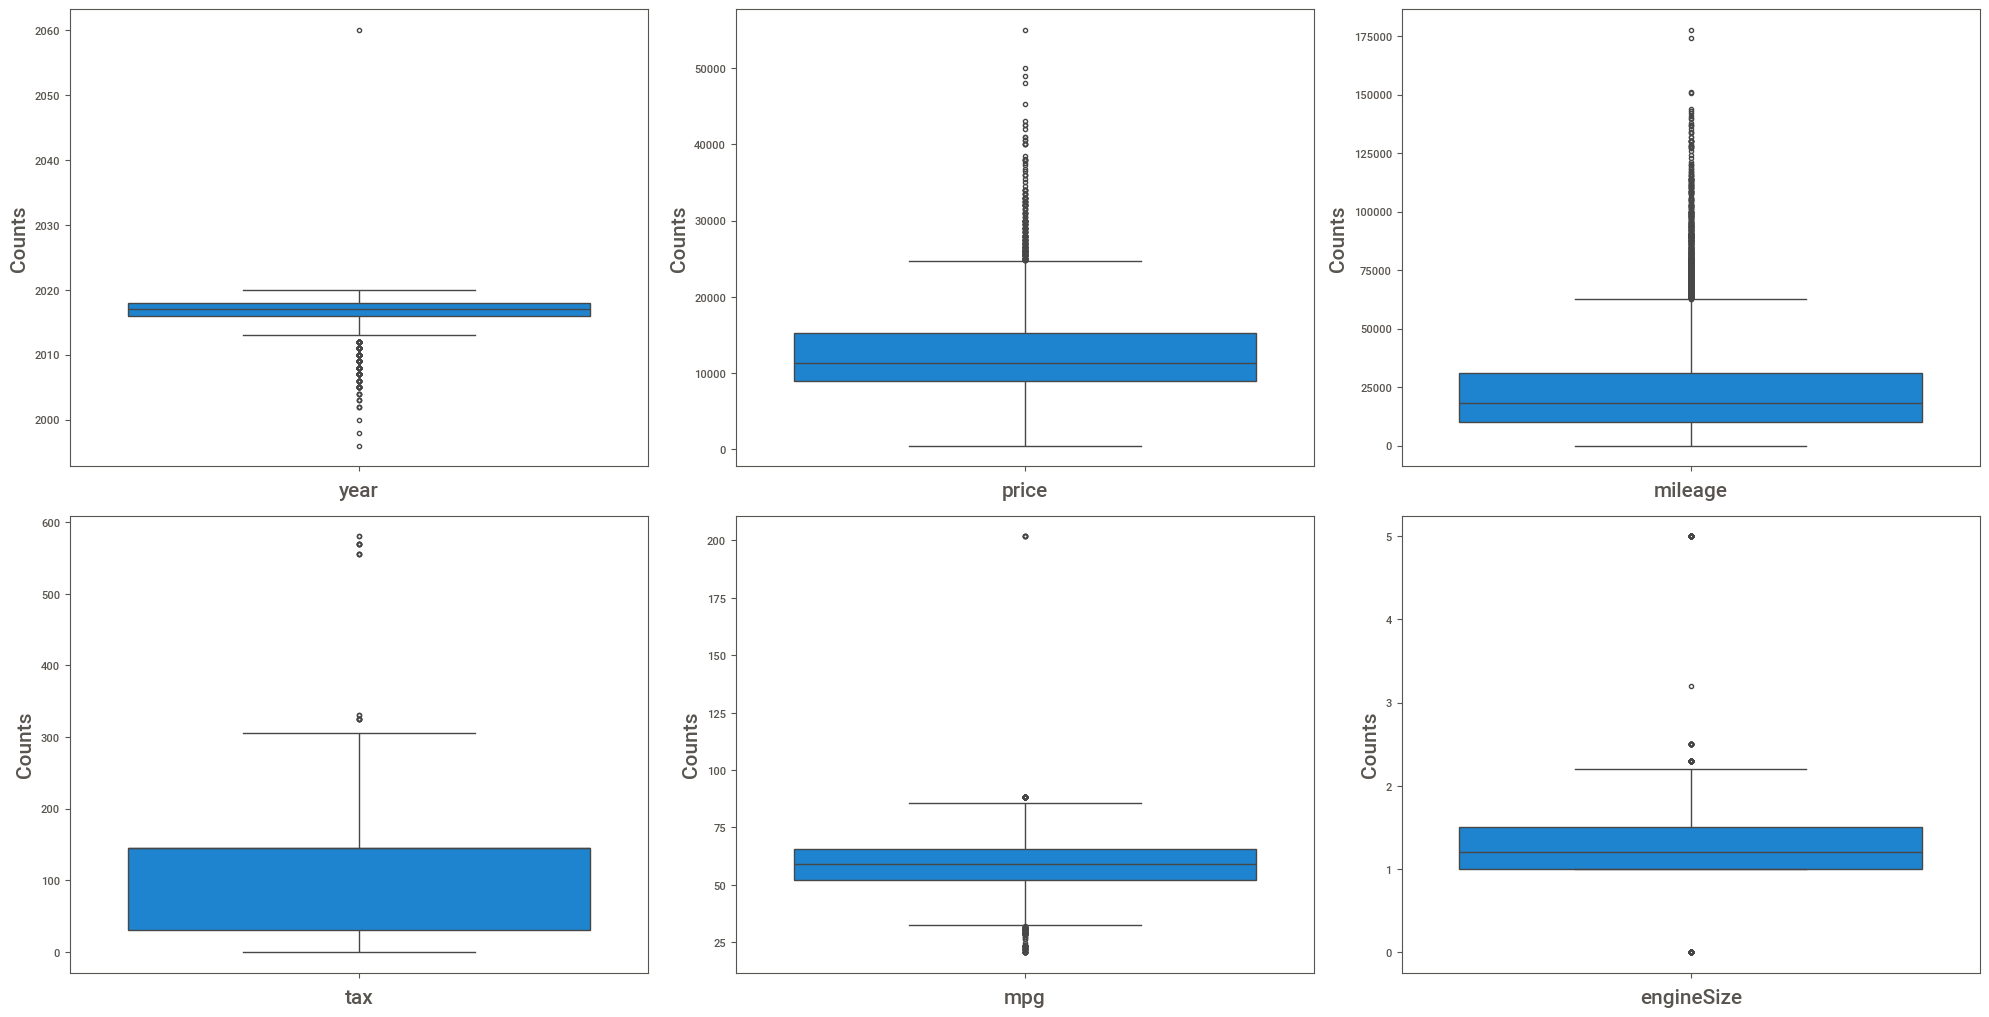

In [72]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in num_col:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(num_col[i])
        plt.xlabel(i,fontsize=15)
        plt.ylabel("Counts",fontsize=15)
    plotnumber+=1
plt.tight_layout()

### Encoding useing map

In [73]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000.0,Automatic,15944.0,Petrol,150.0,57.7,1.0
1,2018,14000.0,Manual,9083.0,Petrol,150.0,57.7,1.0
2,2017,13000.0,Manual,12456.0,Petrol,150.0,57.7,1.0
3,2019,17500.0,Manual,10460.0,Petrol,145.0,40.3,1.5
4,2019,16500.0,Automatic,1482.0,Petrol,145.0,48.7,1.0


In [74]:
## Transmission 
data.transmission.value_counts()

transmission
Manual       15382
Automatic     1354
Semi-Auto     1075
Name: count, dtype: int64

In [75]:
data.transmission=data.transmission.map({'Manual':2,'Automatic':1,'Semi-Auto':0})

In [76]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000.0,1,15944.0,Petrol,150.0,57.7,1.0
1,2018,14000.0,2,9083.0,Petrol,150.0,57.7,1.0
2,2017,13000.0,2,12456.0,Petrol,150.0,57.7,1.0
3,2019,17500.0,2,10460.0,Petrol,145.0,40.3,1.5
4,2019,16500.0,1,1482.0,Petrol,145.0,48.7,1.0


In [77]:
## FuelType
data.fuelType.value_counts()

fuelType
Petrol      12080
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

In [78]:
data.fuelType=data.fuelType.map({'Petrol':4,'Diesel':3,'Hybrid':2,'Electric':1,'Other':0})

In [79]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12000.0,1,15944.0,4,150.0,57.7,1.0
1,2018,14000.0,2,9083.0,4,150.0,57.7,1.0
2,2017,13000.0,2,12456.0,4,150.0,57.7,1.0
3,2019,17500.0,2,10460.0,4,145.0,40.3,1.5
4,2019,16500.0,1,1482.0,4,145.0,48.7,1.0


## Chack the Corr-relation

<Axes: >

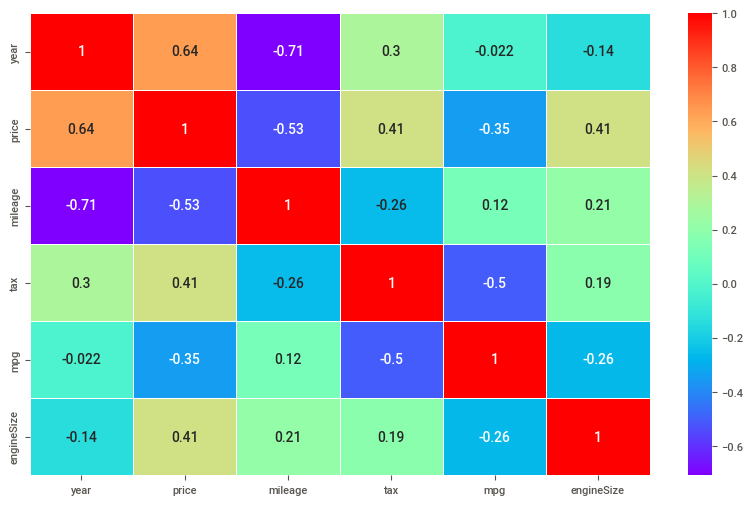

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(num_col.corr(),annot=True,cmap='rainbow',linewidth=0.5)

## Data Preprocessing

In [81]:
df=data.copy()

In [82]:
## let's scale 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
    'engineSize']]=scaler.fit_transform(df[['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg','engineSize']])

## Create X and y

In [83]:
X = df.drop('price',axis=1)
y = df.price

In [84]:
X.head(2)

,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.042984,-1.521459,-0.336290,0.685399,0.610614,-0.026096,-0.8946
1,0.597673,0.372628,-0.837449,0.685399,0.610614,-0.026096,-0.8946


In [85]:
y.head(2)

0    12000.0
1    14000.0
Name: price, dtype: float64

In [86]:
df.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.042984,12000.0,-1.521459,-0.336290,0.685399,0.610614,-0.026096,-0.894600
1,0.597673,14000.0,0.372628,-0.837449,0.685399,0.610614,-0.026096,-0.894600
2,-0.042984,13000.0,0.372628,-0.591070,0.685399,0.610614,-0.026096,-0.894600
3,1.238329,17500.0,0.372628,-0.736867,0.685399,0.528294,-1.905026,0.426955
4,1.238329,16500.0,-1.521459,-1.392661,0.685399,0.528294,-0.997956,-0.894600


In [87]:
## split the Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=14)

In [88]:
X_train.shape

(14248, 7)

In [89]:
y_test.shape

(3563,)

# Create Model Creation

In [91]:
## Best max_depth for my model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
param_grid = {'max_depth': range(1, 20)}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_max_depth = grid_search.best_params_['max_depth']
print(f'The best max_depth is:{best_max_depth}')

The best max_depth is:10


## Model -1 Decision Tree Regressor

In [92]:
## Model Creation 
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=10)
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)

In [93]:
## chack metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,classification_report

In [94]:
r2_score(y_test,dt_predict)

0.8479806993449511

In [95]:
MSE = mean_squared_error(y_test,dt_predict)
print(f'MSE:{MSE}')

MSE:2620465.780977892


In [96]:
MAE = mean_absolute_error(y_test,dt_predict)
print(f'MAE:{MAE}')

MAE:1068.9465982551203


## Cross Val Score cheack 

In [97]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.85764361 0.82693402 0.46559058]
Cross validation Score: 0.7167227357020064
Std : 0.17801926785958316


In [98]:
## Search Best Paramaters for My Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300],
              'max_depth':(list(range(1,20))),
              'min_samples_split':(list(range(1,10))),
              'min_samples_leaf':(list(range(1,6))),
              'max_features':['auto','sqrt','log2'],
              'bootstrap':[True,False]
             }


rf = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=3, scoring='r2', verbose=2,n_jobs=-1,n_iter=100,random_state=42)

rand_search.fit(X_train, y_train)
best_n_estimators = rand_search.best_params_
print(f'Best Paramaters:{best_n_estimators}')


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramaters:{'n_estimators': 300, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 14, 'bootstrap': False}


## Model :2 Random Forest Regressor

In [99]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=300,min_samples_split=3,min_samples_leaf=2,max_features='log2',max_depth=14,bootstrap=False)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)


In [100]:
r2_score(y_test,rf_pred)

0.874950333622961

In [101]:
mean_squared_error(y_test,rf_pred)

2155570.8403586117

In [102]:
mean_absolute_error(y_test,rf_pred)

992.168929212968

## Cross Val Score cheack 

In [103]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=3,scoring='r2')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.88562761 0.86195966 0.57146757]
Cross validation Score: 0.7730182822047968
Std : 0.14284504127073008


## Model :3 XGBRegressor

In [104]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=150)
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

In [105]:
r2_score(y_test,xgb_pred)

0.8663890485461224

In [106]:
mean_squared_error(y_test,xgb_pred)

2303147.8551743757

In [107]:
mean_absolute_error(y_test,xgb_pred)

991.6153299780597

## Model :4 XGB Regressor with GridSearchCV

In [108]:
## Search Best estimators for My Model
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor 
params = {'n_estimators':[50,100,150,200,250,300]}

xgb = XGBRegressor(verbosity=2,random_state=42)
grid_search = GridSearchCV(param_grid=params,estimator=xgb,scoring='r2',cv=3,verbose=3)

grid_search.fit(X_train,y_train)
best_n_estimators = grid_search.best_params_['n_estimators']
print(f'Best paramaters:{best_n_estimators}')


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ...................n_estimators=50;, score=0.870 total time=   0.2s
[CV 2/3] END ...................n_estimators=50;, score=0.869 total time=   0.3s
[CV 3/3] END ...................n_estimators=50;, score=0.876 total time=   0.1s
[CV 1/3] END ..................n_estimators=100;, score=0.872 total time=   0.3s
[CV 2/3] END ..................n_estimators=100;, score=0.869 total time=   0.4s
[CV 3/3] END ..................n_estimators=100;, score=0.874 total time=   0.5s
[CV 1/3] END ..................n_estimators=150;, score=0.870 total time=   0.6s
[CV 2/3] END ..................n_estimators=150;, score=0.866 total time=   0.7s
[CV 3/3] END ..................n_estimators=150;, score=0.872 total time=   0.6s
[CV 1/3] END ..................n_estimators=200;, score=0.870 total time=   0.7s
[CV 2/3] END ..................n_estimators=200;, score=0.863 total time=   1.2s
[CV 3/3] END ..................n_estimators=200;,

In [130]:
from xgboost import XGBRegressor
xgb2 = XGBRegressor(n_estimators=50)
xgb2.fit(X_train,y_train)
xgb_pred2 = xgb2.predict(X_test)

In [131]:
r2_score(y_test,xgb_pred2)

0.8714162477802039

In [132]:
mean_squared_error(y_test,xgb_pred2)

2216490.4142421805

In [133]:
mean_absolute_error(y_test,xgb_pred2)

990.7346291687421

## Model :5 XGB Regressor with RandomizedSearchCV

In [113]:
from sklearn.model_selection import RandomizedSearchCV
params_grid = {
    'gamma':[0.1,00,0.2,0.3,1.6,4.7,12.01,65,200],
    'learning_rate':[0.1,0.001,0.001,0.2,0.3],
    'n_estimators':[50,100,150,200,250,300],
    'max_depth':(list(range(1,20))),
    'reg_lambda':[0.1,0.01,0.2,0.3,0.4,0.8,6.4,12.6],
    'rag_alpha':[0.1,0.01,0.2,0.3,0.4,0.8,6.4,12.6]
}

xgb = XGBRegressor(varbosity=2,random_state=42)
grid_search = RandomizedSearchCV(param_distributions=params_grid,estimator=xgb,cv=3,verbose=2,scoring='r2',n_iter=100,n_jobs=-1)

grid_search.fit(X_train,y_train)
best_param = grid_search.best_params_
print(f'Best Paramators:{best_param}')

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Paramators:{'reg_lambda': 12.6, 'rag_alpha': 0.8, 'n_estimators': 250, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0}


In [116]:
xgb3 = XGBRegressor(rag_lambda=12.6,rag_alpha=0.8,n_estimators=250,max_depth=7,learning_rate=0.1,gamma=0)
xgb3.fit(X_train,y_train)
xgb_pred3 = xgb3.predict(X_test)


In [117]:
r2_score(y_test,xgb_pred3)

0.8742775945986553

In [118]:
mean_absolute_error(y_test,xgb_pred3)

959.3222833716497

In [119]:
mean_squared_error(y_test,xgb_pred3)

2167167.3257070202

## Model :6 Bagging Regressor

In [120]:
from sklearn.ensemble import BaggingRegressor
bagg = BaggingRegressor()
bagg.fit(X_train,y_train)
bagg_pred = bagg.predict(X_test)


In [121]:
r2_score(y_test,bagg_pred)

0.8454190090970246

In [122]:
mean_absolute_error(y_test,bagg_pred)

1075.632578721167

In [123]:
mean_squared_error(y_test,bagg_pred)

2664623.474160472

## Model :7 Bagging Regressor with HyperParamater Tuning

In [124]:
bagg2 = BaggingRegressor(base_estimator=xgb2,
                         n_estimators=100,
                         max_samples=1.0,
                         max_features=1.0,
                         bootstrap=True)

bagg2.fit(X_train,y_train)
bagg2_pred = bagg2.predict(X_test)
                     

In [125]:
r2_score(bagg2_pred,y_test)

0.8619985568985938

In [126]:
mean_squared_error(bagg2_pred,y_test)

2102618.0265393793

In [127]:
mean_absolute_error(bagg2_pred,y_test)

962.5063777716284

## Model Comparison

In [134]:
df = pd.DataFrame()
df['Model']=['Decision Tree','Random Forest Regressor','XGBRegressor','XGBRegressor 2','XGB Hyperparameter','Bagging Regressor','Bagging Regreesor Hyperparameter']
df['r2_score'] = [84,87,86,87,87,84,86]
df['MAE'] = [1068,992,991,990,959,1075,962]

In [135]:
df

,Model,r2_score,MAE
0,Decision Tree,84,1068
1,Random Forest Regressor,87,992
2,XGBRegressor,86,991
3,XGBRegressor 2,87,990
4,XGB Hyperparameter,87,959
5,Bagging Regressor,84,1075
6,Bagging Regreesor Hyperparameter,86,962


## Coparision using Graph

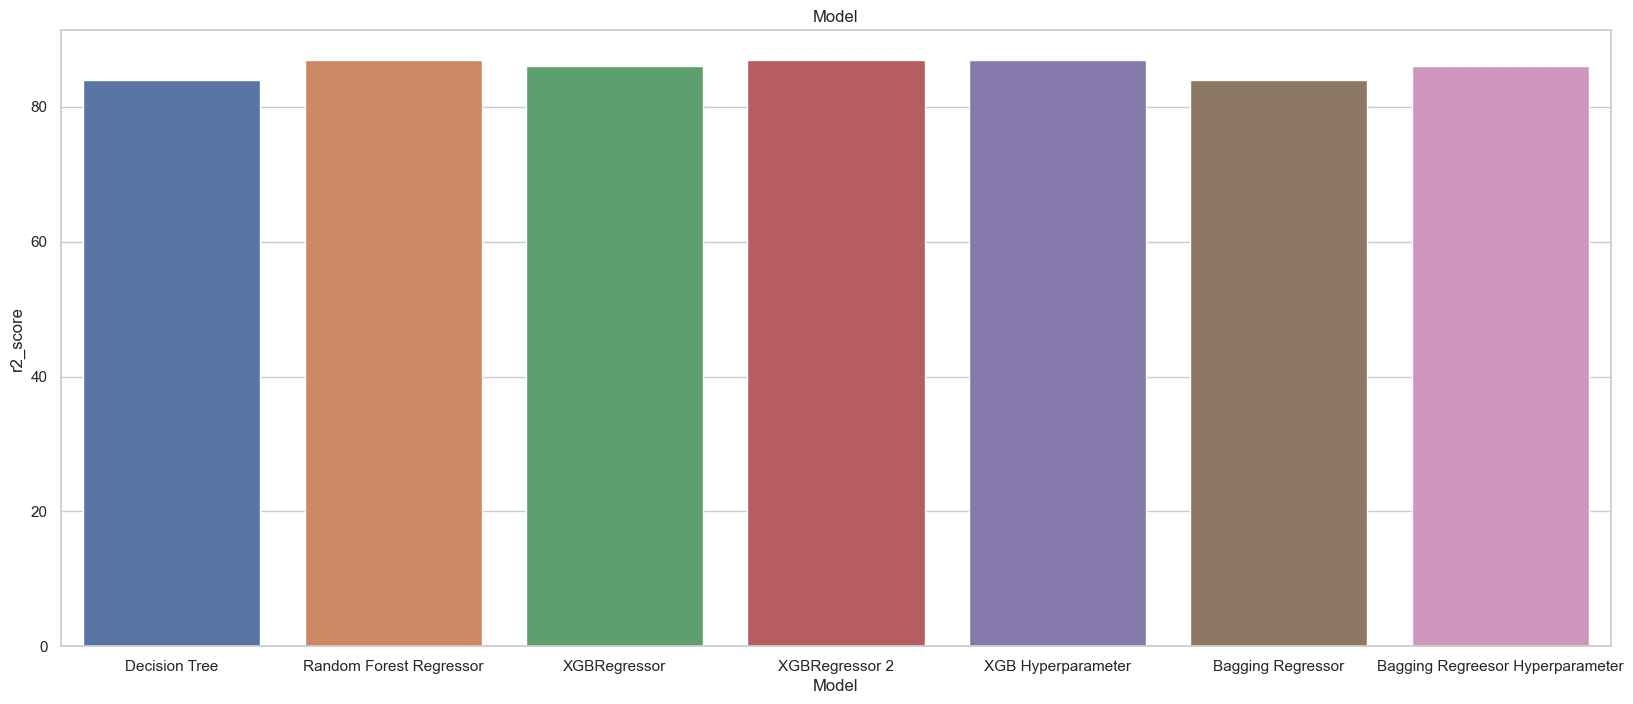

In [137]:
plt.figure(figsize=(20,8))
sns.set(style='whitegrid')
sns.barplot(x='Model',y='r2_score',data=df,hue='Model')
plt.title('Model')
plt.show()

## Summary

* **Model Performance:** The overall performance of the models is relatively good, with R-squared scores ranging from approximately 84 to 87. This indicates that the models explain a significant portion of the variance in the target variable.
* **Best Model:** Among the models, **Random Forest Regressor**, **XGBRegressor** and **XGBRegressor 2** appear to be the top performers with R-squared scores slightly higher than the others.
* **Model Comparison:** The bar plot allows for a quick visual comparison of the models' performance. It's clear that there are some differences in the R-squared scores, but the overall performance is relatively consistent across most models.

In conclusion, the plot suggests that the majority of the regression models considered in this analysis are effective in predicting the target variable. However, there are slight variations in performance, with XGBRegressor and XGBRegressor 2 potentially being the preferred choices based on the R-squared scores.

Overall, the analysis suggests that the majority of the regression models considered in this study are effective in predicting the target variable. However, there are slight variations in performance, with XGBRegressor 2 and XGB Hyperparameter potentially being the preferred choices based on the combination of R-squared scores and MAEs